# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the codes provided.

In [ ]:
import numpy as np
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=2500):
        self.lr = learning_rate
        self.ep = epochs
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.ep):
            y_pred = np.dot(X, self.w) + self.b
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db
    def predict(self, X):
        return np.dot(X, self.w) + self.b


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


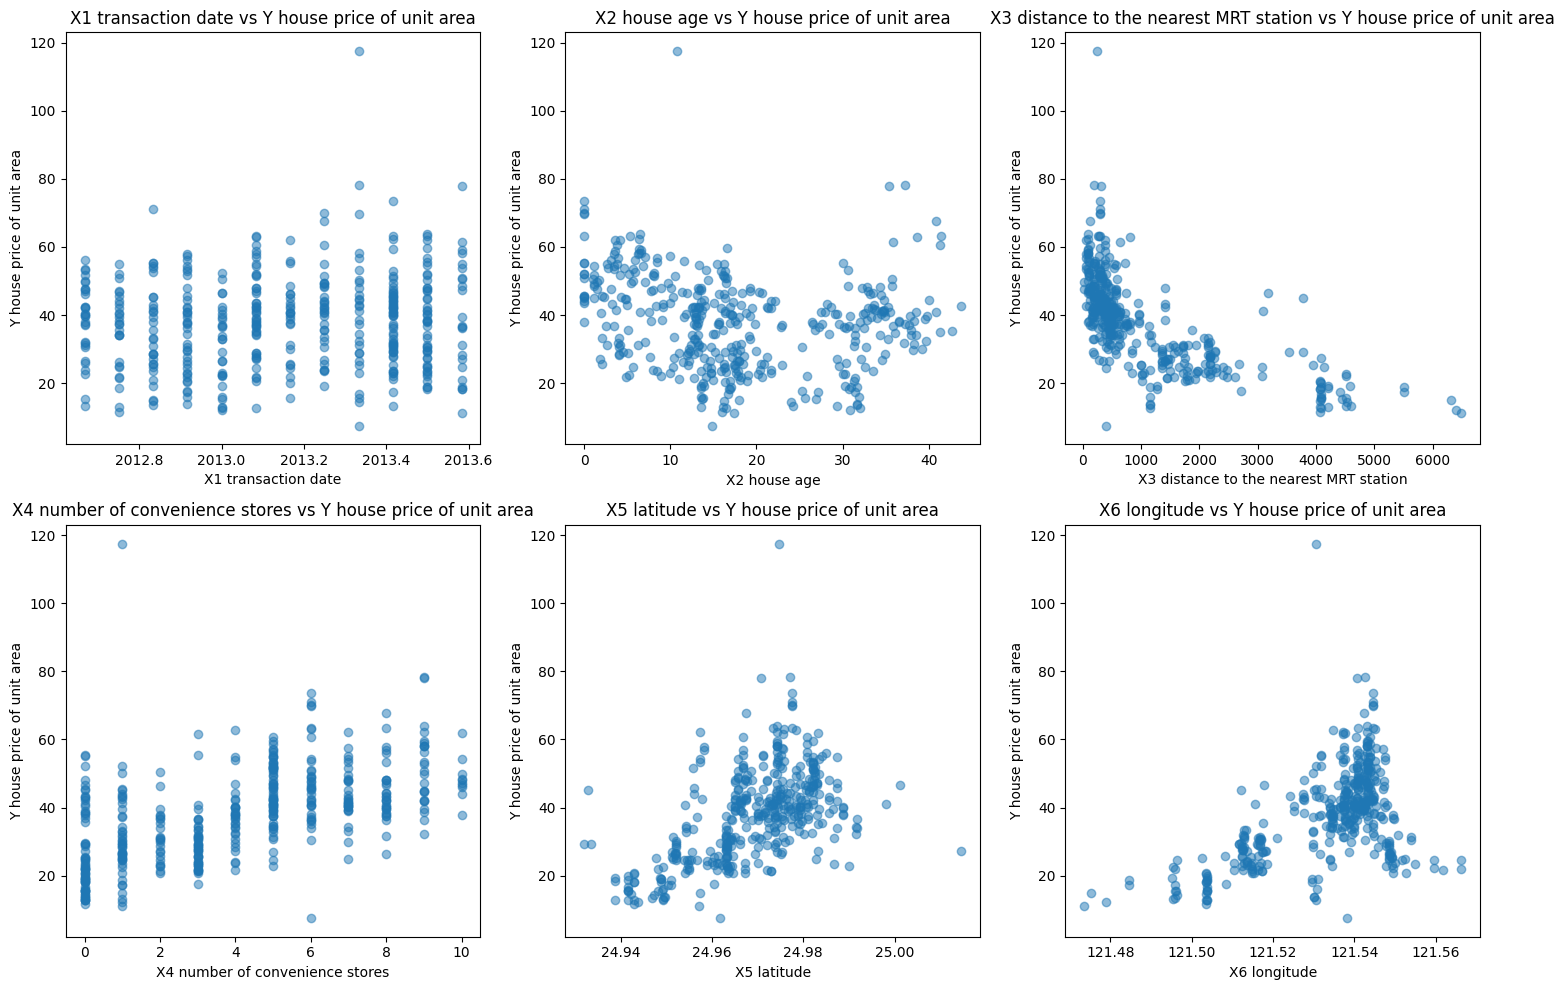

MSE: 67.78565110915059
R²: 0.5726500734262303
Sklearn Model - MSE: 66.67336271835958
Sklearn Model - R²: 0.5796624182861772
MSE2: 66.62666916033706
R²2: 0.5799567945777062


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR


df = pd.read_csv('/content/Real estate.csv')

print(df.isnull().sum())

y_axis = 'Y house price of unit area'
x_axis = df.columns[1:-1]
plt.figure(figsize=(15, 10))
for i, col in enumerate(x_axis):
    plt.subplot(2, 3, i+1)
    plt.scatter(df[col], df[y_axis], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel(y_axis)
    plt.title(f'{col} vs {y_axis}')
plt.tight_layout()
plt.show()

df.drop(columns=['No'], inplace=True)

X = df.drop(columns=[y_axis]).values
y = df[y_axis].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


sk_linreg = SklearnLR()
sk_linreg.fit(X_train, y_train)
y_pred_sk = sk_linreg.predict(X_test)

mse_sk = mean_squared_error(y_test, y_pred_sk)
r2_sk = r2_score(y_test, y_pred_sk)

print("Sklearn Model - MSE:", mse_sk)
print("Sklearn Model - R²:", r2_sk)



linreg2 = LinearRegression(learning_rate=0.5, epochs=2500)
linreg2.fit(X_train, y_train)
y_pred = linreg2.predict(X_test)


mse2 = mean_squared_error(y_test, y_pred)
r22 = r2_score(y_test, y_pred)

print("MSE2:", mse2)
print("R²2:", r22)



# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Write code for the sigmoid function and Logistic regression.


In [ ]:
def sigmoid(z):
   return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z)*(1 - sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias = np.random.randn(1,1)

        #Implement the GD algortihm
        for _ in range(self.epochs):
          z = np.dot(X, self.weights) + self.bias
          y_pred = sigmoid(z)

          dw = -np.dot(X.T,(y - y_pred))/n_samples
          db = -np.sum(y - y_pred)/n_samples

          self.weights -= self.lr * dw
          self.bias -= self.lr * db

    def predict(self, X):
      #Write the predict function
        y_pred = np.dot(X, self.weights) + self.bias
        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [ ]:
custom_model = LogisticRegression(learning_rate=0.01, epochs=2500)
custom_model.fit(X_train, y_train)
custom_preds = custom_model.predict(X_test)
custom_acc = accuracy_score(y_test, custom_preds)
print(f"Accuracy: {custom_acc:.4f}")


Accuracy: 0.2558


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
glass_df = pd.read_csv('/content/glass.csv')
X = glass_df.iloc[:, 0:8].values
y = glass_df.iloc[:, 9].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN(object):

    def __init__(self,k):
        self.k=k

    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train

    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)

    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]


custom_knn = KNN(k=4) # k=4 worked better for me than k=3
custom_knn.fit(X_train, y_train)





7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [ ]:
custom_preds = custom_knn.predict(X_test)
custom_acc = accuracy_score(y_test, custom_preds)
print(f"Custom KNN (k=4) Accuracy: {custom_acc:.4f}")

# random testing gave me this result:
custom_knn2 = KNN(k=1)
custom_knn2.fit(X_train, y_train)
custom_preds2 = custom_knn2.predict(X_test)
custom_acc2 = accuracy_score(y_test, custom_preds2)
print(f"Custom KNN (k=1) Accuracy: {custom_acc2:.4f}")
# k = 1 and 2 works best

Custom KNN (k=4) Accuracy: 0.7674
Custom KNN (k=1) Accuracy: 0.8140


In [ ]:
sklearn_knn = KNeighborsClassifier(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
sklearn_preds = sklearn_knn.predict(X_test)
sklearn_acc = accuracy_score(y_test, sklearn_preds)
print(f"\nSklearn KNN (k=3) Accuracy: {sklearn_acc:.4f}")
# even for this model k=1 gives best result


Sklearn KNN (k=3) Accuracy: 0.7209
